In [1]:
# Stiahnite CSV súbor z
# https://peter.butka.website.tuke.sk/res/solutions.csv
# a uložte ho do pracovného adresára

from urllib.request import urlretrieve


url1 = 'https://peter.butka.website.tuke.sk/res/solutions.csv'
filename1 = 'data/solution_py.csv'
urlretrieve(url1, filename1)

('data/solution_py.csv', <http.client.HTTPMessage at 0x18f5c6d3fa0>)

In [2]:
# Vytvorte dataframe (pomocou knižnice pandas)s názvom dfsolutions,
# ktorý bude obsahovať tieto stiahnuté dáta

import pandas as pd


dfsolutions = pd.read_csv('data/solution_py.csv')

In [3]:
# Uložte do premennej time hodnoty atribútu time_left z dataframu dfsolutions

time = dfsolutions['time_left'].tolist()

In [4]:
# Vypíšte do konzoly iba prvých 10 riadkov dát

dfsolutions.head(10)

,id,problem_id,subject_id,start,stop,time_left,answer
0,1,156,29,1304095119,1.304095e+09,2343.0,B
1,2,269,25,1304095119,1.304095e+09,2329.0,C
2,3,34,22,1304095127,1.304095e+09,2366.0,C
3,4,19,23,1304095127,1.304095e+09,2362.0,D
4,5,605,26,1304095127,1.304095e+09,2345.0,A
5,6,384,27,1304095131,1.304095e+09,2242.0,C
6,7,538,28,1304095133,1.304095e+09,2311.0,C
7,8,312,24,1304095134,1.304095e+09,2314.0,D
8,9,327,22,1304095151,1.304095e+09,2328.0,E
9,10,194,23,1304095152,1.304095e+09,2337.0,A


In [5]:
# Vypíšte do konzoly informácie o dátach spolu s dátovým typom každého atribútu
# a náhľadom jeho hodnôt pomocou jedného príkazu

dfsolutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          205 non-null    int64  
 1   problem_id  205 non-null    int64  
 2   subject_id  205 non-null    int64  
 3   start       205 non-null    int64  
 4   stop        199 non-null    float64
 5   time_left   199 non-null    float64
 6   answer      199 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 11.3+ KB


In [6]:
# Vymažte v dátach všetky záznamy, ktoré obsahujú chýbajúce hodnoty

dfsolutions = dfsolutions.dropna()

In [7]:
# Transformujte atribút subject_id z dátového typu integer na category

dfsolutions['subject_id'] = dfsolutions['subject_id'].astype('category')
# dfSolutions.info()

In [8]:
# Vypíšte do konzoly šiestu hodnotu v poradí z atribútu stop

print(dfsolutions['stop'][5])

1304095270.0


In [9]:
# Vypíšte do konzoly hodnotu v šiestom riadku a štvrtom stĺpci

print(dfsolutions.iloc[5, 3])

1304095131


In [10]:
# Vytvorte dataframe s názvom dfsolutions_numeric,
# ktorý bude obsahovať len numerické atribúty z dataframu dfsolutions

dfsolutions_numeric = dfsolutions.select_dtypes(include='number')
# dfsolutions_numeric.head(5)

In [11]:
# Použite vhodnú funkciu na cyklické spracovanie, ktorá vypočíta
# priemery hodnôt všetkých atribútov uložených v dfsolutions_numeric

print(dfsolutions_numeric.mean())

id            1.001457e+02
problem_id    3.102412e+02
start         1.304096e+09
stop          1.304096e+09
time_left     1.124769e+03
dtype: float64


In [12]:
# Vytvorte nový atribút do dfsolutions s názvom time,
# ktorý bude obsahovať hodnotu TRUE, ak je hodnota v stĺpci
# time_left väčšia ako 2200. Inak bude obsahovať hodnotu FALSE.

dfsolutions['time'] = dfsolutions['time_left'] > 2200
# print(dfsolutions.iloc[10:15, :])

In [13]:
# Vytvorte nový dataframe s názvom dfsolutions_1, ktorý bude obsahovať len dáta,
# kde hodnoty atribútu problem_id sú väčšie ako 200.

dfsolutions_1 = dfsolutions[dfsolutions['problem_id'] > 200]
# dfsolutions_1.head(5)

In [14]:
# Usporiadajte dataframe dfsolutions podľa atribútu subject_id
# a uložte ho do dataframu s názvom dfsolutions_2

dfsolutions_2 = dfsolutions.sort_values(by='subject_id')
# dfsolutions_2.head(5)

In [15]:
# Vypíšte sumarizáciu atribútu time_left (Min, Max, Medián, Priemer, 1Q, 3Q)

print(dfsolutions['time_left'].describe())

count     199.000000
mean     1124.768844
std       718.462716
min        17.000000
25%       468.000000
50%      1061.000000
75%      1776.500000
max      2366.000000
Name: time_left, dtype: float64


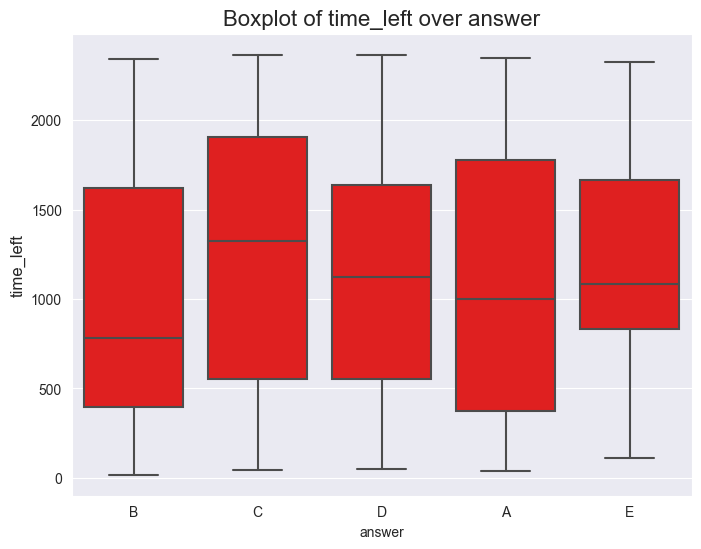

In [16]:
# Vytvorte boxplot (pomocou knižnice seaborn) červenej farby,
# ktorý zobrazí hodnoty numerického atribútu time_left rozdelené podľa atribútu answer.

import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

sns.boxplot(data=dfsolutions, x='answer', y='time_left', color='red')

plt.title('Boxplot of time_left over answer', fontsize=16)
plt.ylabel('time_left', fontsize=12)

plt.show()

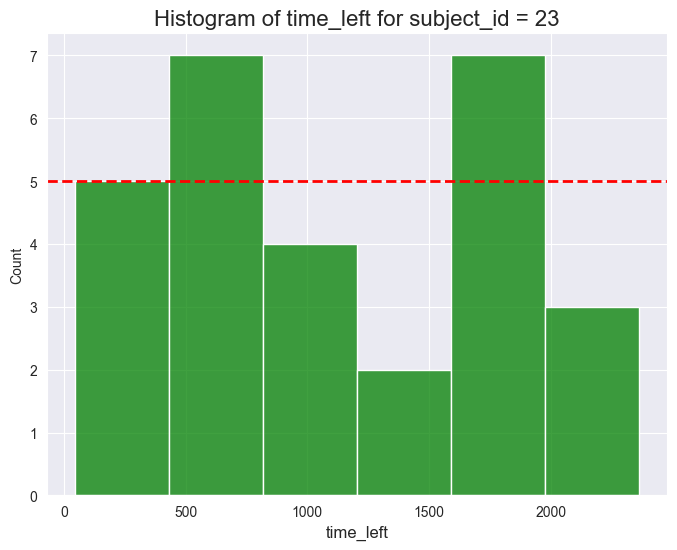

In [17]:
# Vytvorte (pomocou knižnice seaborn) histogram zelenej farby,
# ktorý zobrazí hodnoty numerického atribútu time_left len záznamov,
# kde subject_id = 23. Do grafu pridajte tiež hrubú,
# prerušovanú horizontálnu čiaru na hodnote 5.

# sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

sns.histplot(data=dfsolutions[dfsolutions['subject_id'] == 23], x='time_left', color='green')

# Add a horizontal line at y=5
plt.axhline(y=5, color='red', linestyle='--', linewidth=2)

plt.title('Histogram of time_left for subject_id = 23', fontsize=16)
plt.xlabel('time_left', fontsize=12)

plt.show()

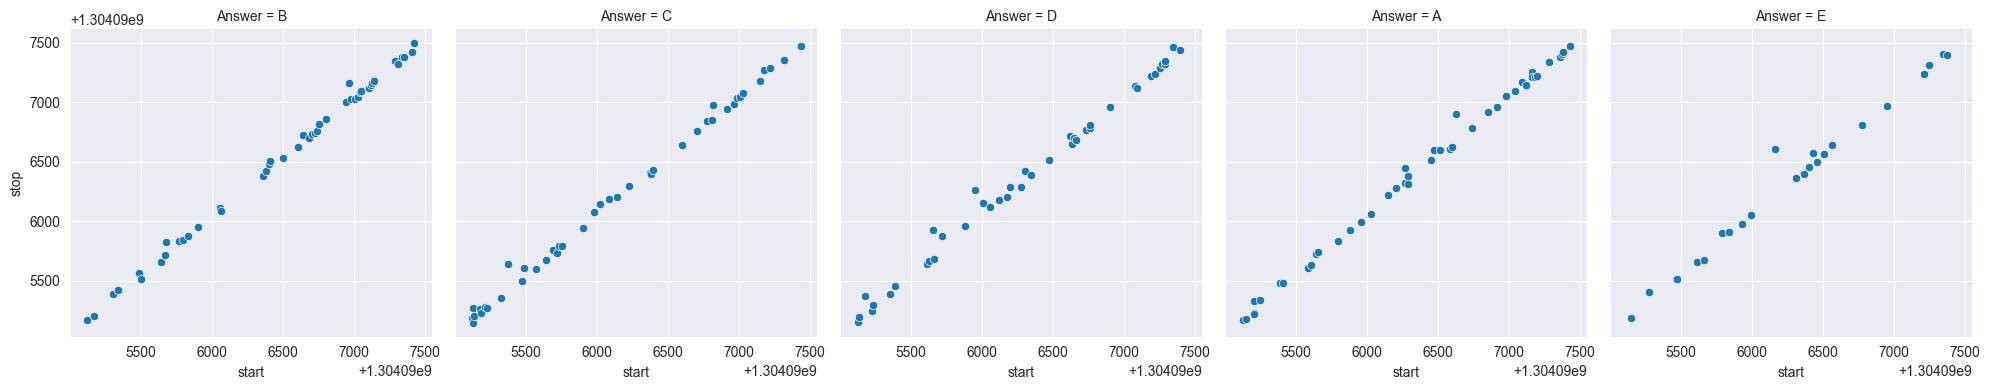

In [18]:
# Pomocou knižnice seaborn vytvorte 5 grafov vedľa seba,
# ktoré budú znázorňovať bodové grafy atribútu start v závislosti od atribútu stop.
# Tieto grafy rozdeľte podľa atribútu answer.

g = sns.FacetGrid(dfsolutions, col='answer', height=4)
g.map(sns.scatterplot, 'start', 'stop')
g.set_titles('Answer = {col_name}')

plt.show()

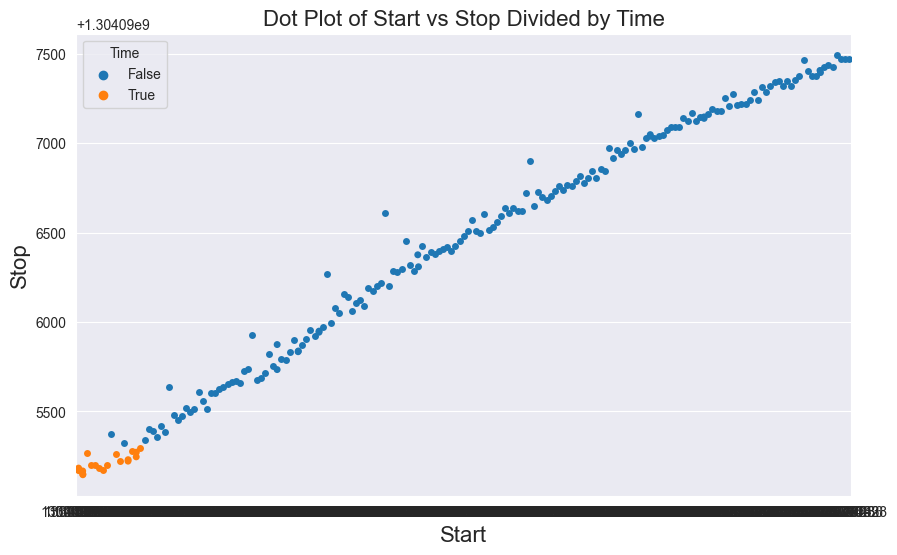

In [19]:
# Pomocou knižnice seaborn vytvorte jednu vizualizáciu v podobe bodových grafov,
# ktoré bude znázorňovať atribút start v závislosti od atribútu stop,
# pričom grafy rozdeľte podľa time.

plt.figure(figsize=(10, 6))
sns.stripplot(data=dfsolutions, x='start', y='stop', hue='time')

plt.title('Dot Plot of Start vs Stop Divided by Time', fontsize=16)
plt.xlabel('Start', fontsize=16)
plt.ylabel('Stop', fontsize=16)
plt.legend(title='Time')

plt.show()

In [20]:
# Príklad na funkciu, cyklus a podmienku:
# Vytvorte funkciu s názvom funkcia, ktorá bude obsahovať vstupné premenné c,d,n.
# Vytvorte vektor f, ktorý bude nadobúdať hodnoty od 1 po n s krokom 0.5.
# Použitím cyklu prejdite všetky čísla vektora f a pomocou vetvenia urobte nasledovne operácie:
# • Ak je aktuálne číslo totožné s c, nahraďte ho na výstupe znakom „A“
# • Ak je aktuálne číslo totožné s d, nahraďte na výstupe znakom „B“
# • Inak vypíšte normálnu hodnotu aktuálneho čísla z vektora f
# Na záver spustite vytvorenú funkciu s vami (vhodne) zvolenými vstupnými premennými.

def funkcia(c, d, n):
    f = [x/2 for x in range(2, n*2+1)]
    for num in f:
        if num == c:
            print('A')
        elif num == d:
            print('B')
        else:
            print(num)
        
funkcia(1.5, 2, 3)

1.0
A
B
2.5
3.0


In [21]:
# Ďalšia úloha na grafy:
# Pre dáta quakes (dostupné na https://peter.butka.website.tuke.sk/res/quakes.csv)

url2 = 'https://peter.butka.website.tuke.sk/res/quakes.csv'
filename2 = 'data/quakes_py.csv'
urlretrieve(url2, filename2)

('data/quakes_py.csv', <http.client.HTTPMessage at 0x18f5d1fc850>)

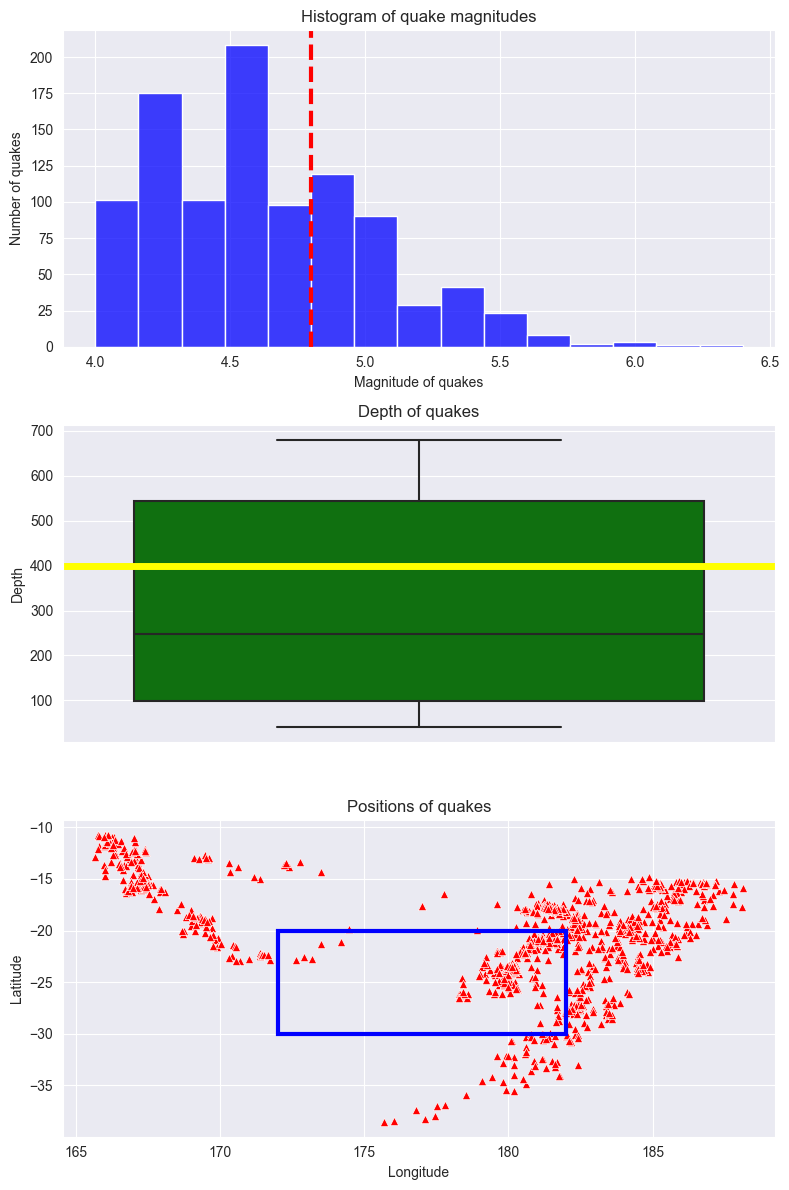

In [22]:
# vytvorte v rámci knižnice seaborn vizualizácie - rozdeľte plochu zobrazovania na 3 časti tak,
# aby sa zobrazili 3 grafy pod sebou (rozdelenie plochy pre rôzne typy grafov je možné napríklad
# pomocou knižnice matplotlib cez subplots), každá z nich potom bude mať nasledovnú náplňou:

import matplotlib.patches as patches


quakes = pd.read_csv('data/quakes_py.csv')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

#    - Prvý graf (horný) bude histogram atribútu mag s nastavením 15 hraničných hodnôt,
#      pričom bude modrej farby, ako aj s popisom osi x "Magnitude of quakes", osi y "Number of quakes",
#      hlavného nadpisu "Histogram of quake magnitudes". Pridajte ku grafu vertikálnu
#      prerušovanú čiaru pre hodnotu magnitúdy 4.8 červenej farby a hrúbky 3.

sns.histplot(data=quakes, x='mag', bins=15, color='blue', ax=axes[0])
axes[0].axvline(x=4.8, color='red', linestyle='--', linewidth=3)
axes[0].set_xlabel("Magnitude of quakes")
axes[0].set_ylabel("Number of quakes")
axes[0].set_title("Histogram of quake magnitudes")

#    - Druhý graf (stredný) bude boxplot atribútu depth zelenej farby s popisom osi y "Depth"
#      a hlavným nadpisom "Depth of quakes". Pridajte ku grafu čiaru hrúbky 5 žltej farby
#      pre hodnotu atribútu depth rovnú 400.

sns.boxplot(data=quakes, y='depth', color='green', ax=axes[1])
axes[1].axhline(y=400, color='yellow', linewidth=5)
axes[1].set_ylabel("Depth")
axes[1].set_title("Depth of quakes")

#    - Tretí graf (spodný) bude bodový graf pre atribút lat na osi y a long na osi x.
#      Typ bodu v grafe bude plný trojuholník a ich farba bude červená.
#      Popisy zodpovedajúcich osí budú "Latitude" a "Longitude", hlavný nadpis bude "Positions of quakes".
#      Následne vložíte do grafu obdĺžnik (pomocou matplotlib.patches) s hranami modrej farby hrúbky 3 tak,
#      aby ohraničoval oblasť s hodnotami lat <-30,-20> a long <172,182>.

sns.scatterplot(data=quakes, x='long', y='lat', marker='^', color='red', ax=axes[2])
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")
axes[2].set_title("Positions of quakes")

rect = patches.Rectangle((172, -30), 10, 10, linewidth=3, edgecolor='blue', facecolor='none')
axes[2].add_patch(rect)


plt.tight_layout()
plt.show()